100%|██████████| 170M/170M [00:03<00:00, 49.2MB/s]


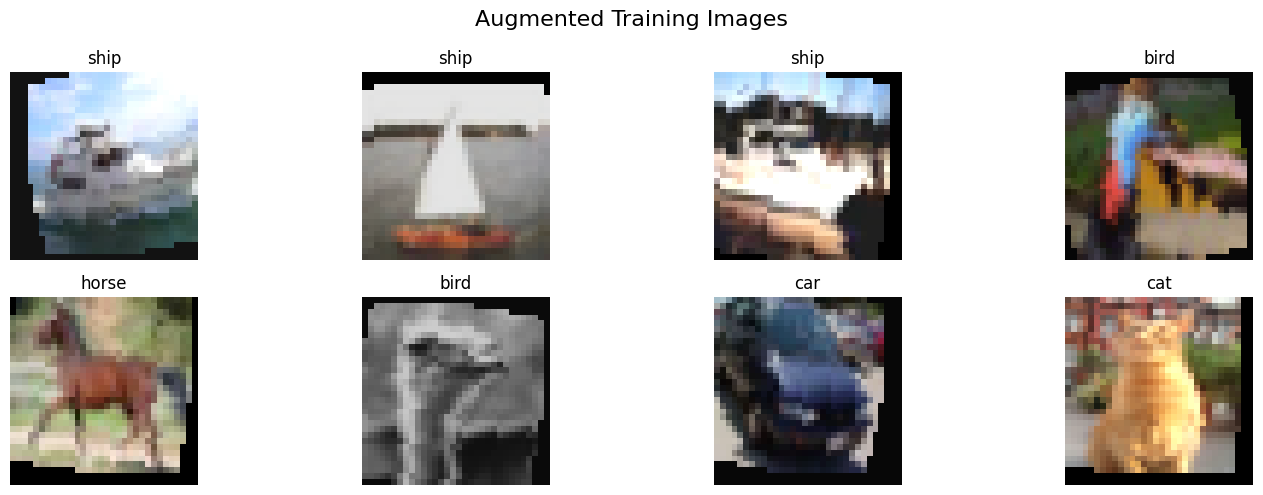

Epoch 1/15: 100%|██████████| 391/391 [00:37<00:00, 10.43it/s]


Epoch 1/15 | Train Loss: 1.5683 | Train Acc: 42.27% | Test Loss: 1.1048 | Test Acc: 60.56%


Epoch 2/15: 100%|██████████| 391/391 [00:36<00:00, 10.84it/s]


Epoch 2/15 | Train Loss: 1.2032 | Train Acc: 56.79% | Test Loss: 1.0077 | Test Acc: 62.82%


Epoch 3/15: 100%|██████████| 391/391 [00:35<00:00, 10.90it/s]


Epoch 3/15 | Train Loss: 1.0535 | Train Acc: 62.42% | Test Loss: 0.8386 | Test Acc: 70.54%


Epoch 4/15: 100%|██████████| 391/391 [00:36<00:00, 10.84it/s]


Epoch 4/15 | Train Loss: 0.9667 | Train Acc: 65.71% | Test Loss: 0.7582 | Test Acc: 72.97%


Epoch 5/15: 100%|██████████| 391/391 [00:35<00:00, 10.95it/s]


Epoch 5/15 | Train Loss: 0.9082 | Train Acc: 67.78% | Test Loss: 0.6686 | Test Acc: 76.42%


Epoch 6/15: 100%|██████████| 391/391 [00:35<00:00, 11.00it/s]


Epoch 6/15 | Train Loss: 0.8619 | Train Acc: 69.86% | Test Loss: 0.6759 | Test Acc: 75.92%


Epoch 7/15: 100%|██████████| 391/391 [00:35<00:00, 10.95it/s]


Epoch 7/15 | Train Loss: 0.8255 | Train Acc: 70.97% | Test Loss: 0.6210 | Test Acc: 78.03%


Epoch 8/15: 100%|██████████| 391/391 [00:35<00:00, 10.87it/s]


Epoch 8/15 | Train Loss: 0.7951 | Train Acc: 72.21% | Test Loss: 0.5680 | Test Acc: 80.22%


Epoch 9/15: 100%|██████████| 391/391 [00:35<00:00, 10.91it/s]


Epoch 9/15 | Train Loss: 0.7655 | Train Acc: 73.23% | Test Loss: 0.5862 | Test Acc: 79.28%


Epoch 10/15: 100%|██████████| 391/391 [00:35<00:00, 11.00it/s]


Epoch 10/15 | Train Loss: 0.7431 | Train Acc: 74.07% | Test Loss: 0.5366 | Test Acc: 81.21%


Epoch 11/15: 100%|██████████| 391/391 [00:35<00:00, 10.90it/s]


Epoch 11/15 | Train Loss: 0.7230 | Train Acc: 74.97% | Test Loss: 0.6257 | Test Acc: 78.07%


Epoch 12/15: 100%|██████████| 391/391 [00:36<00:00, 10.85it/s]


Epoch 12/15 | Train Loss: 0.7070 | Train Acc: 75.56% | Test Loss: 0.5495 | Test Acc: 81.17%


Epoch 13/15: 100%|██████████| 391/391 [00:35<00:00, 11.09it/s]


Epoch 13/15 | Train Loss: 0.6937 | Train Acc: 75.88% | Test Loss: 0.6059 | Test Acc: 79.01%


Epoch 14/15: 100%|██████████| 391/391 [00:35<00:00, 11.13it/s]


Epoch 14/15 | Train Loss: 0.6801 | Train Acc: 76.28% | Test Loss: 0.4891 | Test Acc: 82.73%


Epoch 15/15: 100%|██████████| 391/391 [00:35<00:00, 11.14it/s]


Epoch 15/15 | Train Loss: 0.6676 | Train Acc: 76.88% | Test Loss: 0.4969 | Test Acc: 82.96%


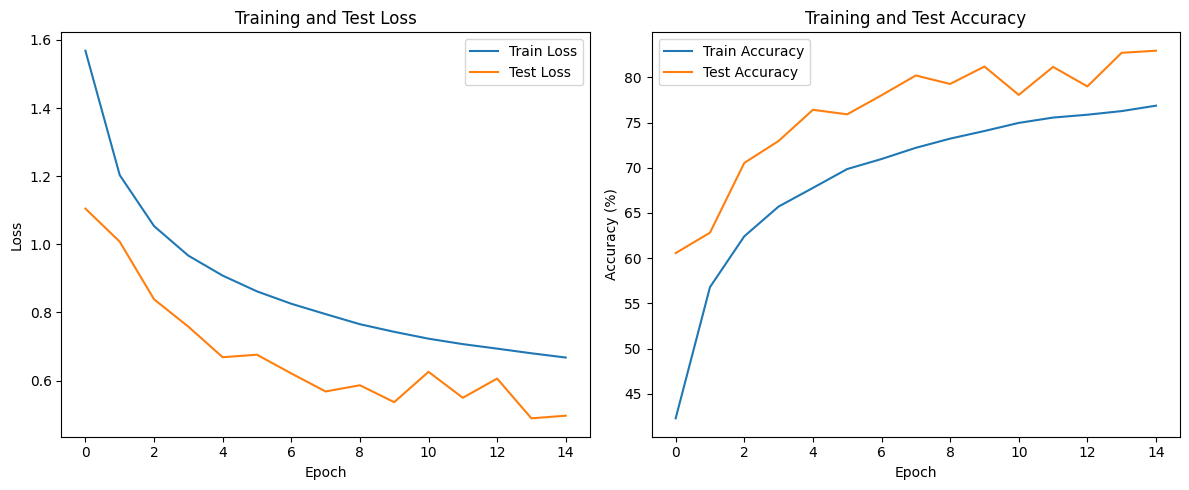

Training complete. Best Test Accuracy: 82.96%
Final Test Accuracy: 82.96%


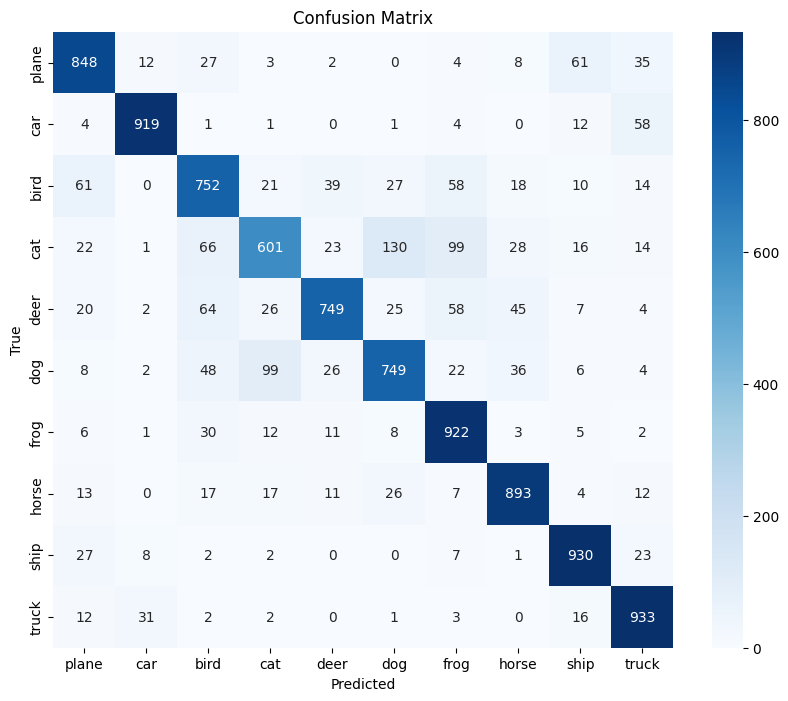

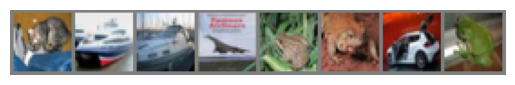

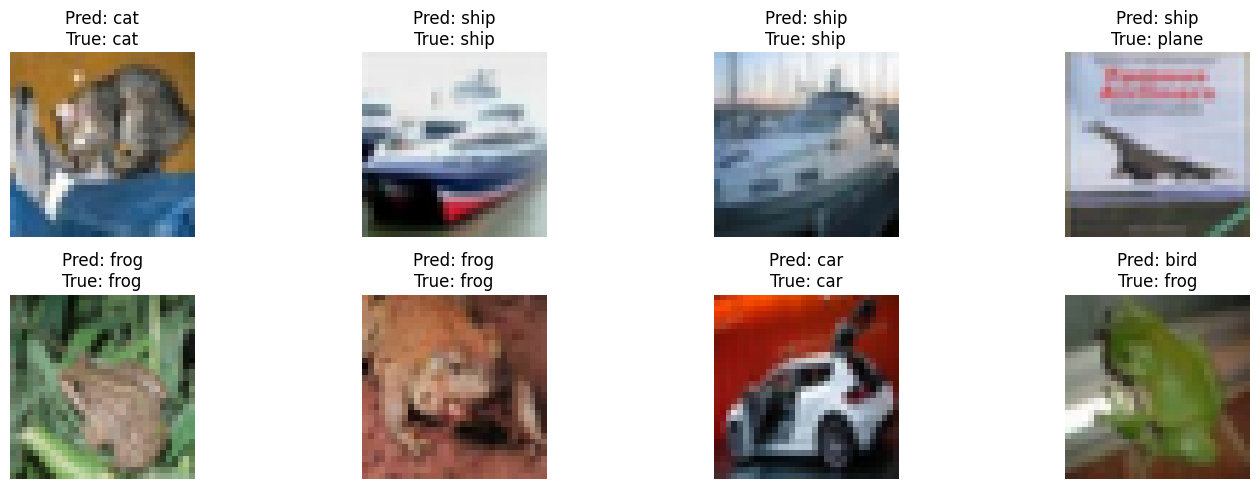

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 1. Data Loading with Augmentation
# Define multiple augmentation transforms
augmentation_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),  # 50% chance of flipping
    transforms.RandomRotation(15),           # Random rotation between -15 and 15 degrees
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # Random translation
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # Color adjustments
    transforms.RandomGrayscale(p=0.1),      # 10% chance of grayscale
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Basic transform without augmentation for test set
basic_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=augmentation_transforms)
test_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=basic_transform)

# Create data loaders
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=128, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=128, shuffle=False, num_workers=2)

# CIFAR-10 classes
classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Visualization of Augmented Images
def show_augmented_images(dataset, num_images=8):
    # Get random samples
    indices = np.random.choice(len(dataset), num_images)
    images = [dataset[i][0] for i in indices]
    labels = [dataset[i][1] for i in indices]

    # Denormalize
    def denormalize(img):
        img = img * 0.5 + 0.5  # Scale from [-1,1] to [0,1]
        return np.clip(img, 0, 1)

    # Plot
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(2, num_images//2, i+1)
        img = denormalize(images[i].numpy().transpose(1, 2, 0))
        plt.imshow(img)
        plt.title(classes[labels[i]])
        plt.axis('off')
    plt.suptitle('Augmented Training Images', fontsize=16)
    plt.tight_layout()
    plt.show()

# Show augmented images
show_augmented_images(train_dataset)

# 3. CNN Model Definition
class CIFAR10_CNN(nn.Module):
    def __init__(self):
        super(CIFAR10_CNN, self).__init__()
        self.features = nn.Sequential(
            # Conv Block 1
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.2),

            # Conv Block 2
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.3),

            # Conv Block 3
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.4),
        )

        self.classifier = nn.Sequential(
            nn.Linear(128 * 4 * 4, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Initialize model
model = CIFAR10_CNN().to(device)

# 4. Training Setup
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5)

# 5. Training Function with Visualization
def train(model, train_loader, test_loader, epochs=50):
    train_losses = []
    test_losses = []
    train_accs = []
    test_accs = []

    best_acc = 0.0

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        # Training loop
        for inputs, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs}'):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_acc = 100. * correct / total

        # Validation
        test_loss, test_acc = evaluate(model, test_loader)
        scheduler.step(test_loss)

        # Store metrics for visualization
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        train_accs.append(train_acc)
        test_accs.append(test_acc)

        # Print statistics
        print(f'Epoch {epoch+1}/{epochs} | '
              f'Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% | '
              f'Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}%')

        # Save best model
        if test_acc > best_acc:
            best_acc = test_acc
            torch.save(model.state_dict(), 'best_cifar10_cnn_augmented.pth')

    # Plot training history
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Test Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accs, label='Train Accuracy')
    plt.plot(test_accs, label='Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title('Training and Test Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    print(f'Training complete. Best Test Accuracy: {best_acc:.2f}%')
    model.load_state_dict(torch.load('best_cifar10_cnn_augmented.pth'))
    return model

# 6. Evaluation Function
def evaluate(model, test_loader):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    test_loss = running_loss / len(test_loader)
    test_acc = 100. * correct / total
    return test_loss, test_acc

# 7. Confusion Matrix Visualization
def plot_confusion_matrix(model, test_loader):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns

    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.numpy())

    cm = confusion_matrix(all_labels, all_preds)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# 8. Main Execution
if __name__ == '__main__':
    # Train the model
    model = train(model, train_loader, test_loader, epochs=15)

    # Final evaluation
    test_loss, test_acc = evaluate(model, test_loader)
    print(f'Final Test Accuracy: {test_acc:.2f}%')

    # Plot confusion matrix
    plot_confusion_matrix(model, test_loader)

    # Show some predictions
    def imshow(img):
        img = img / 2 + 0.5  # Unnormalize
        npimg = img.numpy()
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
        plt.axis('off')

    dataiter = iter(test_loader)
    images, labels = next(dataiter)

    # Show images
    imshow(torchvision.utils.make_grid(images[:8]))

    # Print predictions
    outputs = model(images[:8].to(device))
    _, predicted = torch.max(outputs, 1)

    plt.figure(figsize=(15, 5))
    for i in range(8):
        plt.subplot(2, 4, i+1)
        imshow(images[i])
        plt.title(f'Pred: {classes[predicted[i]]}\nTrue: {classes[labels[i]]}')
    plt.tight_layout()
    plt.show()